### **Implementing the linear SVM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification

# set the default color map for entire notebook
sns.set_theme(style='whitegrid')

In [2]:
class softSVM:
    def __init__(self, C):
        self._support_vectors = None
        self.C = C
        self.w = None
        self.b = None
        self.X = None
        self.y = None

        # n is the number of data points
        self.n = 0

        # d is the number of dimensions
        self.d = 0

    def __decision_function(self, X):
        return X.dot(self.w) + self.b
    
    def __cost(self, margin):
        return (1 / 2) * self.w.dot(self.w) + self.C * np.sum(np.maximum(0, 1 - margin))
    
    def __margin(self, X, y):
        return y * self.__decision_function(X)
    
    def fit(self, X, y, lr = 1e-3, epochs=500):
        # initialise the w and b
        # np.random.seed(12)
        self.n, self.d = X.shape
        self.w = np.random.randn(self.d)
        self.b = 0

        # Required only for plotting
        self.X = X
        self.y = y
        
        # initialise an empty list to store the loss
        loss_array = []

        for _ in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__cost(margin)
            loss_array.append(loss)

            misclassified_pts_idx = np.where(margin < 1)[0]
            d_w = self.w - self.C * np.dot(y[misclassified_pts_idx], X[misclassified_pts_idx])
            self.w -= lr * d_w

            d_b = -self.C * np.sum(y[misclassified_pts_idx])
            self.b -= lr * d_b

        self._support_vectors = np.where(self.__margin(X, y) <= 1)[0]

    def predict(self, X):
        return np.sign(self.__decision_function(X))

    def score(self, X, y):
        p = self.predict(X)
        return np.mean(y==p)
    
    def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, marker='o',
                    s=100, cmap='autumn')
        ax = plt.gca()  # for fetching the current axis, gca stands for get current axis
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        XX, YY = np.meshgrid(xx, yy)
        xy = np.vstack((XX.ravel(), YY.ravel())).T
        Z = self.__decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margin
        ax.contour(XX, YY, Z, colors=['g', 'k', 'g'], levels=[-1, 0, 1],
                    linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
        
        # highlight the support vectors
        ax.scatter(self.X[:, 0][self._support_vectors],
                     self.X[:, 1][self._support_vectors], s=250,
                     linewidth=1, facecolors='none', edgecolors='k')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()        


### **Demo 1: `Linearly Seperable data`**

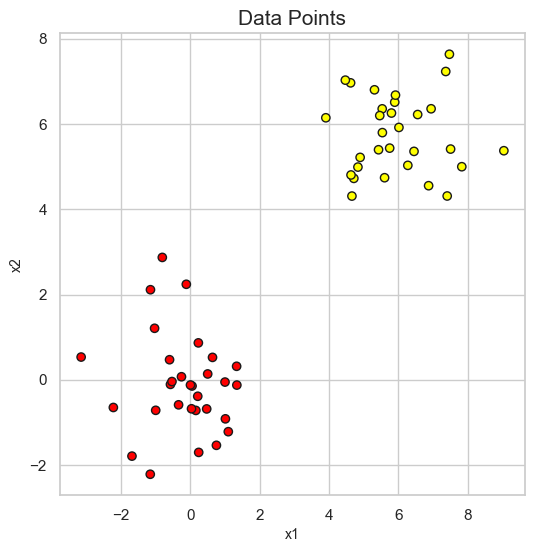

In [3]:
# generate the artificial data points
X, Y = make_blobs(n_samples=60,
                  n_features=2,
                  centers=[[0, 0], [6, 6]],
                  cluster_std=1,
                  random_state=12)
Y = np.where(Y == 0, -1, 1)

# plot the data points
plt.figure(figsize=(6, 6))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolor='k', cmap='autumn')
plt.xlabel('x1', fontsize=10)
plt.ylabel('x2', fontsize=10)
plt.title('Data Points', fontsize=15)
plt.show()

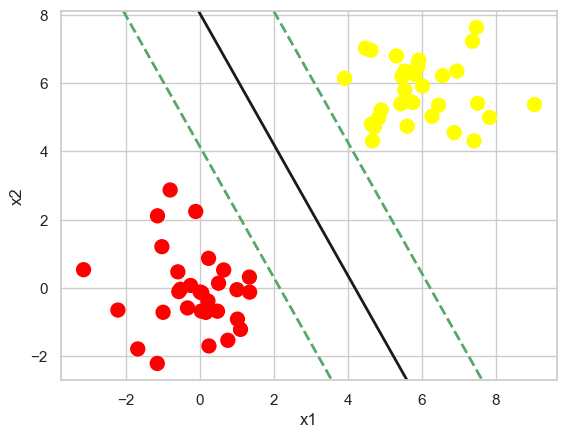

In [8]:
svm = softSVM(C=10)
svm.fit(X, Y)

svm.plot_decision_boundary()

[0.37748955 0.36599683]


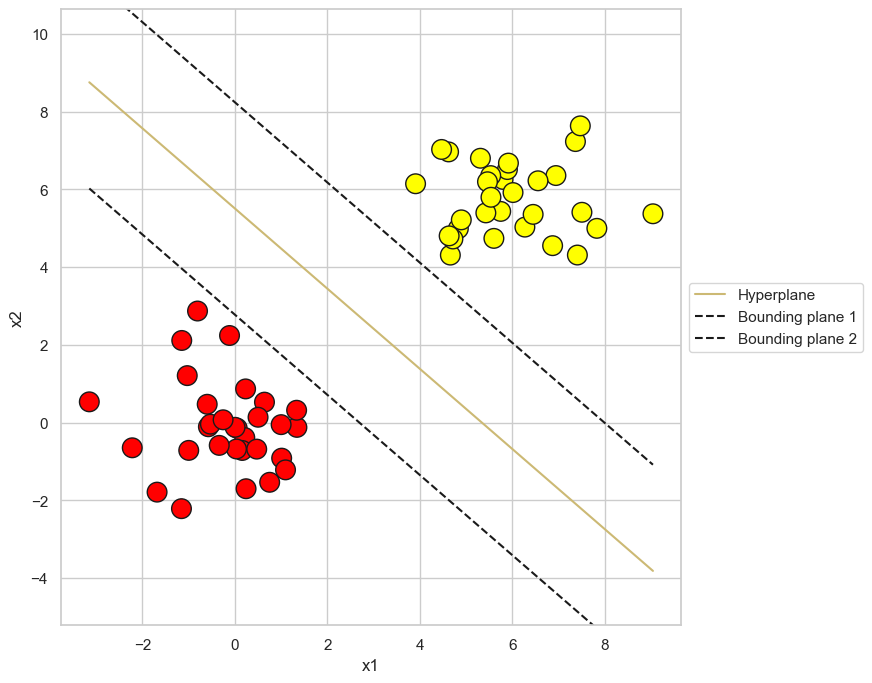

In [4]:
svm = softSVM(C=1)
svm.fit(X, Y)

print(svm.w)

def get_hyperplane_value(x, w, b, offset):
    return -1*(w[0] * x + b + offset) / w[1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=200, edgecolor='k', cmap='autumn')
x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b, 0)
x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b, 0)

x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b, -1)
x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b, -1)

x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b, 1)
x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y', label='Hyperplane')
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k--', label='Bounding plane 1')
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k--', label='Bounding plane 2')

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim(x1_min-3, x1_max+3)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### **Prediction of new example**

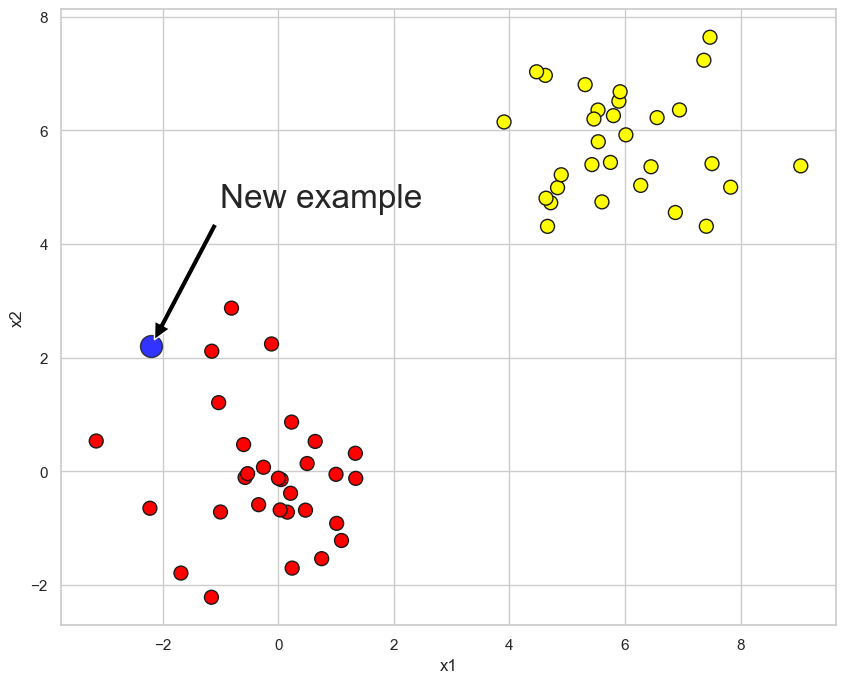

In [50]:
newExample = np.array([-2.2, 2.2])
plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], c=Y, marker="o",\
            s=100, edgecolor='k', cmap='autumn')

plt.scatter(newExample[0], newExample[1], c='blue',
            s=250, edgecolor='k', alpha=0.8)

plt.annotate('New example', xy=newExample,
             xytext=(50, 100), textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=24)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [51]:
svm.predict(newExample)

-1.0

### **Demo 2 : `Linearly Seperable Data with Noise`**

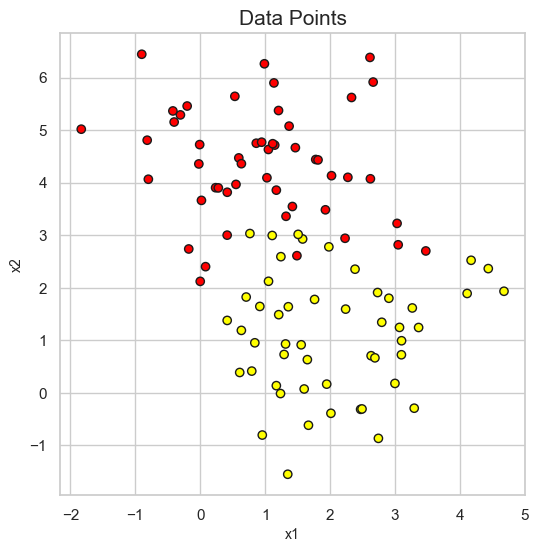

In [53]:
# generate the artificial data points
X, Y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=2,
                  cluster_std=1.1,
                  random_state=0)
Y = np.where(Y == 0, -1, 1)

# plot the data points
plt.figure(figsize=(6, 6))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolor='k', cmap='autumn')
plt.xlabel('x1', fontsize=10)
plt.ylabel('x2', fontsize=10)
plt.title('Data Points', fontsize=15)
plt.show()

[ 1.5661723  -9.37715281] 19.89999999999999


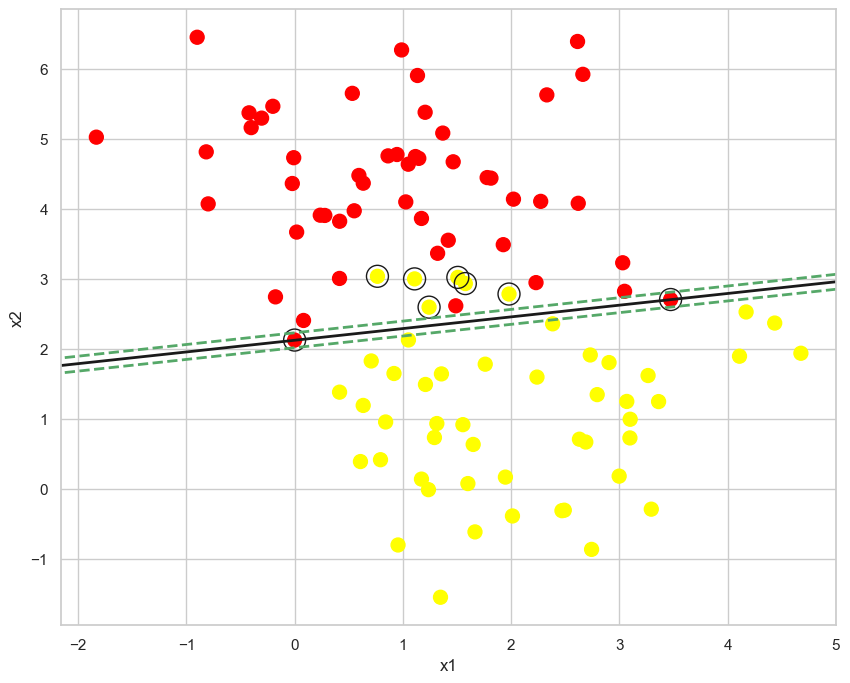

In [69]:
svm = softSVM(C=100)
svm.fit(X, Y)
print(svm.w, svm.b)

fig = plt.figure(figsize=(10, 8))
svm.plot_decision_boundary()

### **Demo 2 : `Non Linearly Seperable Data`**

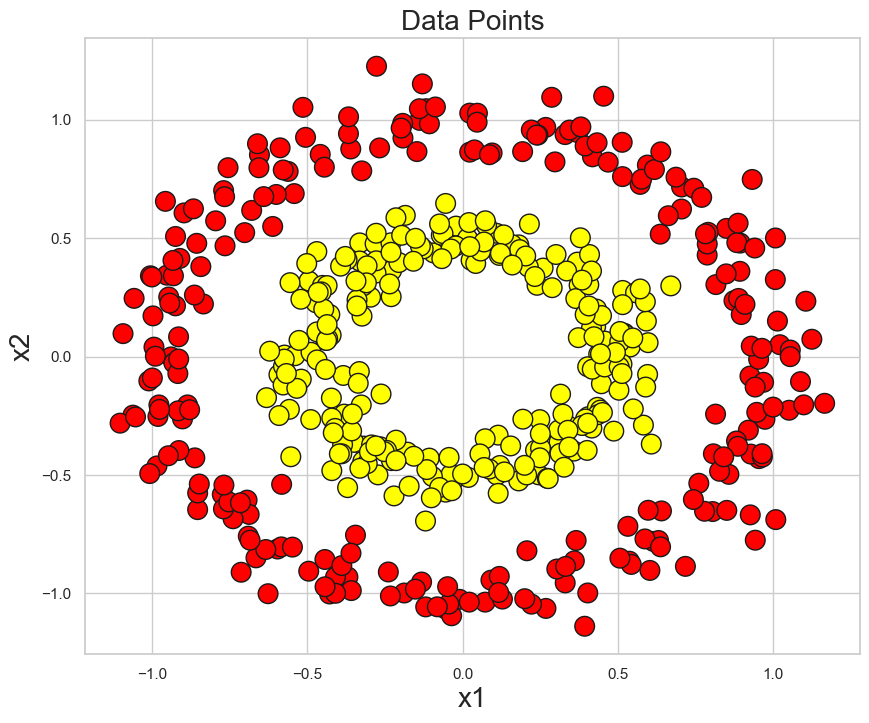

In [98]:
from sklearn.datasets import make_circles

# generate the artificial data points
X, Y = make_circles(500, factor=0.5, noise=0.08)
Y = np.where(Y == 0, -1, 1)

# plot the data points
plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=200, edgecolor='k', cmap='autumn')
plt.xlabel('x1', fontsize=20)
plt.ylabel('x2', fontsize=20)
plt.title('Data Points', fontsize=20)
plt.show()

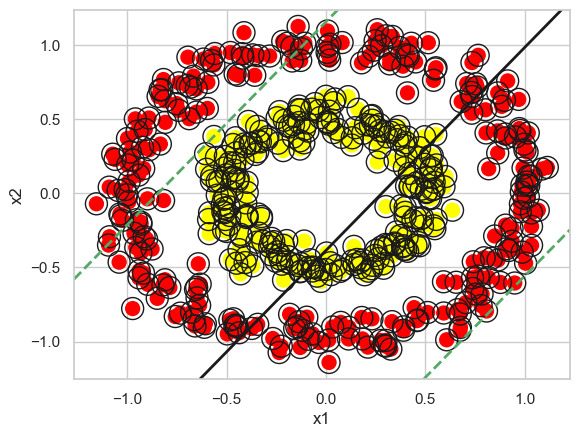

In [90]:
svm = softSVM(C=10)
svm.fit(X, Y)

svm.plot_decision_boundary()